# Wine Quality Predictor

### Description
The dataset provided contains 11 independant attributes and 1 dependant attribute called 'quality'. The objective of this notebook is to correctly identify the 'quality' of a wine based on the provided independent variables.

### High Level Overview
1. Data Exploration: Investigate the data to determine which features can be used to predict wine quality. I plotted each attribute against 'quality' to identify correlations. 5 attributes exhibited a positive or negative relationship with 'quality'.

2. Data Segmentation: In the provided data set, 'quality' appears as a numeric value between 0-10. It would be very hard to predict quality across a range of 0-10. Instead, I converted this range into one of two values, good or bad.

3. Data Normalisation: Normalised independent variables using Min Max normalisation. ML models perform poorly when numerical input data is across different scales. Performance of the model improved by about 5% after this step.

4. Data Sampling: Split the data into training and test data sets.

5. Logistical Regression Model: Built the logistical regression model.

6. Bonus Round Hyper Parameter Tuning: Tested Hyper parameters to work out if the performance of the model can be improved. Regression models can benefit from tuning the 'C' parameter. In this case it didn't help.

### Results

This model is able to correctly identify the quality of a wine > 90% of the time by using a simple logistical regression.


# Import Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Data Binning
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier

#Data Normalisation
from sklearn.preprocessing import MinMaxScaler

#Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV

import joblib

# Import Data

In [3]:
wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Exploration

Profile each attribute to determine if the attribute has an impact on wine quality

<AxesSubplot:xlabel='quality'>

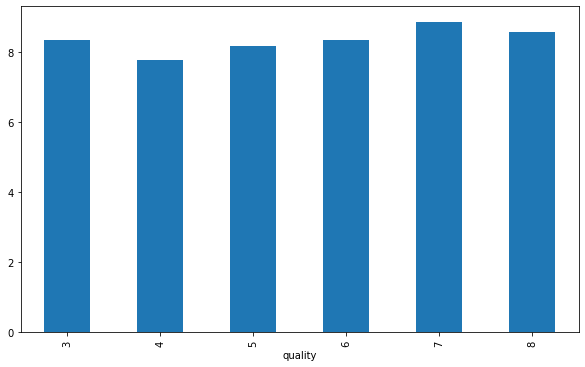

In [5]:
# no real correlation can be observed
wine.groupby('quality')['fixed acidity'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'fixed acidity',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

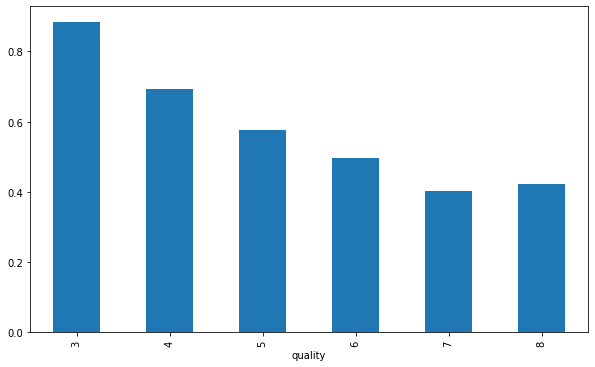

In [6]:
# negative between volatile acidity and quality
wine.groupby('quality')['volatile acidity'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'volatile acidity',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

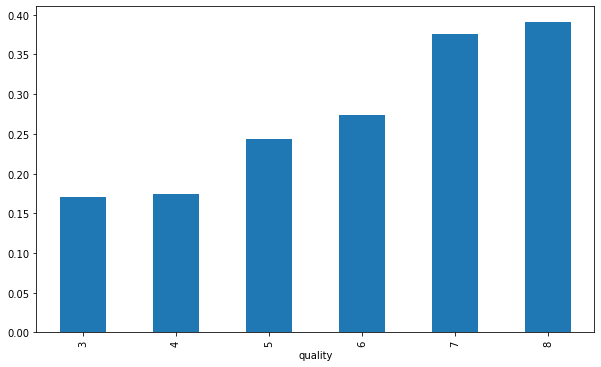

In [7]:
# Strong positive relationship between citric acid and quality
wine.groupby('quality')['citric acid'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'citric acid',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

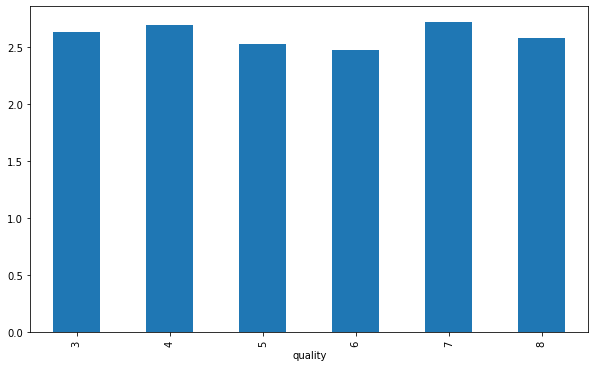

In [8]:
# no correlation
wine.groupby('quality')['residual sugar'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'residual sugar',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

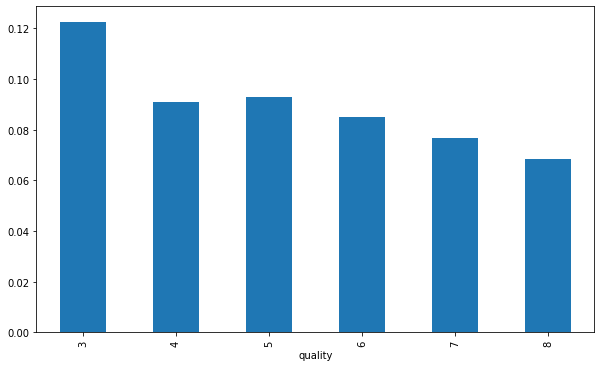

In [9]:
# negative correlation between chlorides and quality
wine.groupby('quality')['chlorides'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'chlorides',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

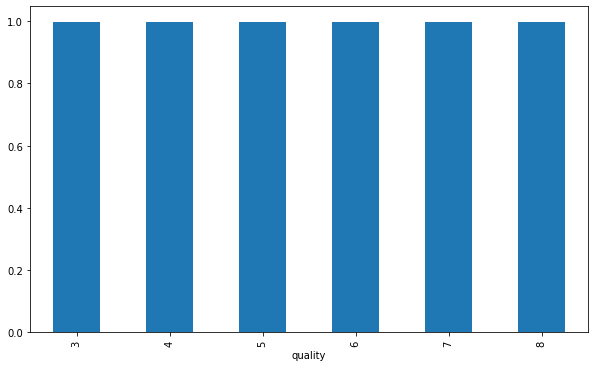

In [10]:
# no correlation
wine.groupby('quality')['density'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'density',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

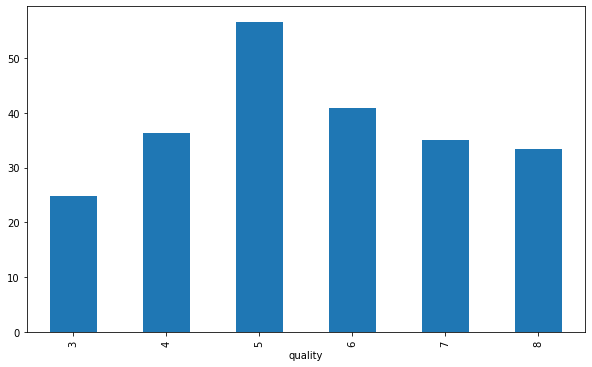

In [11]:
# no correlation
wine.groupby('quality')['total sulfur dioxide'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'total sulfur dioxide',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

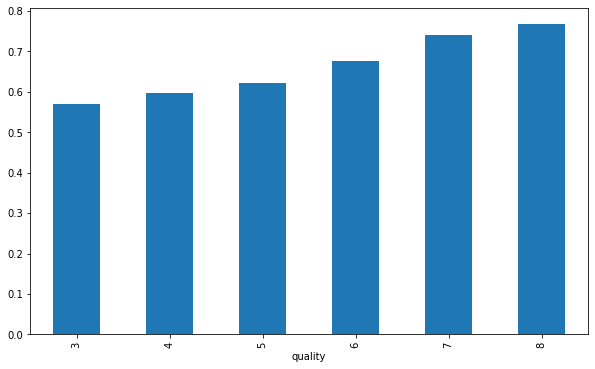

In [12]:
# positive correlation
wine.groupby('quality')['sulphates'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'sulphates',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

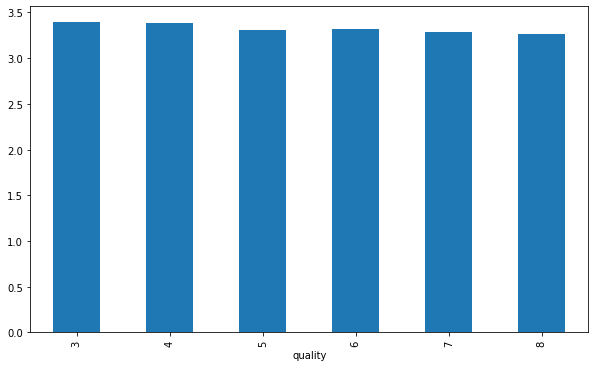

In [13]:
# No correation
wine.groupby('quality')['pH'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'pH',figsize = (10,6))

<AxesSubplot:xlabel='quality'>

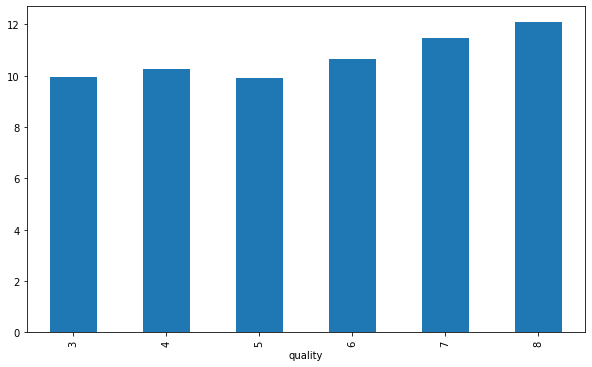

In [14]:
# positive correlation
wine.groupby('quality')['alcohol'] \
    .mean() \
    .plot(kind = 'bar',x = 'quality',y = 'alcohol',figsize = (10,6))

# Data Exploration Outcomes

Based on the results which were returned the following attributes demonstrated a correlation with quality.

* volatile acidity
* citric acid
* chlorides
* sulphates
* alcohol

# Feature Engineering

1. We need to convert the quality value into a categorical value
2. Normalise the selected attributes

In [15]:

# convert continuos quality into categorical data
bins = (2, 6.5, 8)
group_names = [0,1]
wine['quality'] = pd.cut(wine['quality'],bins = bins, labels = group_names)


In [16]:
#label_quality = LabelEncoder()
#label_quality

In [17]:
#wine['quality'] = label_quality.fit_transform(wine['quality'])


In [18]:
wine['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [19]:
# List Attributes which are being kept
keep_variables = ['volatile acidity','citric acid','chlorides','sulphates','alcohol']

# Loop through the attributes being kept and normalise them
for i in keep_variables:
    wine[i] = MinMaxScaler().fit_transform(wine[[i]])

# Extract Features

Extract the dependant and independant variables

In [20]:
# Get the dependant variable
response = 'quality'
y = wine[[response]]

In [21]:
# If the attribute is in the list of attributes we want to keep then persist it into the new_predictors list
predictors = list(wine.columns)
new_predictors = []

for i in range(len(predictors)):
    if predictors[i] in keep_variables:
        new_predictors.append(predictors[i])
        
# Save as x
x = wine[new_predictors]

# Build Machine Learning Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(max_iter=1000)

In [26]:
model = model.fit(x_train,y_train.values.ravel())

In [27]:
model.intercept_

array([-3.86958826])

In [28]:
model.coef_

array([[-2.5424788 ,  1.75396674, -1.46510409,  2.32610718,  4.84223153]])

# Evaluate Model

The model shows quite good results being able to correctly predict wine quality 

In [29]:
model.score(x_test, y_test)

0.87

In [30]:
y_pred = model.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       345
           1       0.62      0.15      0.24        55

    accuracy                           0.87       400
   macro avg       0.75      0.57      0.58       400
weighted avg       0.84      0.87      0.83       400



# Bonus Round - Performance Tuning

Typically, you will only tune the hyperparameters which have the biggest impact. The default settings are usually fine.


In this example I tried tuning the 'C' hyperparameter. This parameter controls how closely the model fits to the training data. It is what is known as a regulisation parameter. Regularisation is a technique with is used to reduce overfitting (where data fits training data too closely) of data by discouraging an overly complex model in some way.

A low 'C' value increases fitting and is more likely to overfit. A high 'C' value decreases fitting and is more likely to underfit.

You can see below that the recommended parameter for this is where C is equal to one. The default value for the logistical regression is also 1 so no changes are required. 


In [32]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std * 2,3),params))

In [33]:
model_evaluation = LogisticRegression()
parameters = {
    'C': [0.001, 0.08,0.9,1,1.1,10,15]
}

cv = GridSearchCV(model_evaluation,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.08, 0.9, 1, 1.1, 10, 15]})

In [34]:
# print best parameter after tuning 
print(cv.best_params_)
#grid_predictions = grid.predict(X_test) 
print_results(cv)

{'C': 1}
BEST PARAMS: {'C': 1}

0.865 (+/-0.004) for {'C': 0.001}
0.865 (+/-0.004) for {'C': 0.08}
0.871 (+/-0.016) for {'C': 0.9}
0.872 (+/-0.013) for {'C': 1}
0.872 (+/-0.011) for {'C': 1.1}
0.869 (+/-0.017) for {'C': 10}
0.87 (+/-0.018) for {'C': 15}


In [35]:
linear_model_tuned = LogisticRegression(C = 10).fit(x_train,y_train.values.ravel())
linear_model_tuned.score(x_test, y_test)

0.8775

In [36]:
cv.best_estimator_

LogisticRegression(C=1)